In [216]:
import vk

In [217]:
token = ""
session = vk.Session(access_token=token)  
vk_api = vk.API(session)

In [218]:
personal_token = ""  
vk_personal_api = vk.API(session)  

In [219]:
import time
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)
    data = first["items"]  
    count = first["count"] // 1000 
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
        time.sleep(3)
    return data

In [220]:
members = get_members("parklivefest")

In [244]:
len(members)

77403

In [90]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"]
            first_name = member["first_name"]
            last_name = member["last_name"]
            
            sex = member["sex"]
            if int(sex) == 1: 
                sex = "F"  
            elif int(sex) == 2: 
                sex = "M"
            else:  # 
                sex = "-" 
                
            bdate = member.get('bdate', "-")  
            if len(bdate.split(".")) == 3: 
                bdate = bdate.split(".")[-1] 
            else:  # 
                bdate = "-" 
                
            city = member.get('city', {}).get("title", "-") 
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")

In [91]:
save_members_to_file("parklive_members.tsv", members)

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
import pandas as pd

df = pd.read_csv("parklive_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [174]:
df = df[df["name"] != "DELETED"]

In [190]:
df.head(10)

,id,name,surname,sex,birth,city,country
0,"34,",Tatyana,Plutalova,F,-,Saint Petersburg,Russia
1,"1050,",Ekaterina,Podovinnikova,F,-,Saint Petersburg,Russia
2,"1207,",Elizaveta,Andreeva,F,1988,-,-
3,"1389,",Ivan,Bezborody,M,1986,Nizhny Novgorod,Russia
4,"1422,",Masha,Egorova,F,-,Saint Petersburg,Russia
5,"1791,",Udalilas,Ivanov,M,-,-,-
6,"2373,",Fin,Ska,F,-,-,-
7,"2659,",Darya,Gladkikh,F,1989,Moscow,Russia
8,"3116,",Anastasia,Neverova,F,1989,Saint Petersburg,Russia
9,"3172,",Nikita,Olenev,M,1989,Saint Petersburg,Russia


In [176]:
city_count = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              19927
Saint Petersburg     6019
Nizhny Novgorod      1087
Yekaterinburg         759
Voronezh              708
Samara                671
Krasnodar             644
Kazan                 615
Rostov-on-Don         568
Novosibirsk           450
Minsk                 449
Perm                  411
Tula                  411
Ufa                   368
Chelyabinsk           336
Volgograd             329
Ryazan                326
Yaroslavl             322
Izhevsk               274
Tver                  265
Name: city, dtype: int64


In [124]:
import matplotlib.pyplot as plt

In [125]:
import seaborn as sns

In [126]:
import pandas as pd

In [177]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              19927
Saint Petersburg     6019
Nizhny Novgorod      1087
Yekaterinburg         759
Voronezh              708
Samara                671
Krasnodar             644
Kazan                 615
Rostov-on-Don         568
Novosibirsk           450
Minsk                 449
Perm                  411
Tula                  411
Ufa                   368
Chelyabinsk           336
Volgograd             329
Ryazan                326
Yaroslavl             322
Izhevsk               274
Tver                  265
Name: city, dtype: int64


In [181]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              19927
Saint Petersburg     6019
Nizhny Novgorod      1087
Yekaterinburg         759
Voronezh              708
Samara                671
Krasnodar             644
Kazan                 615
Rostov-on-Don         568
Novosibirsk           450
Minsk                 449
Perm                  411
Tula                  411
Ufa                   368
Chelyabinsk           336
Volgograd             329
Ryazan                326
Yaroslavl             322
Izhevsk               274
Tver                  265
Name: city, dtype: int64


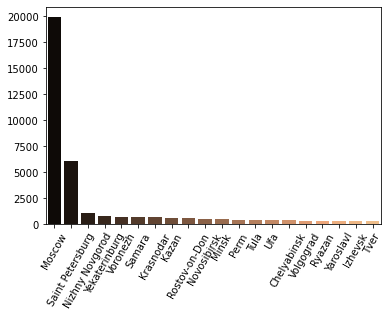

In [128]:
sns.barplot(city_count.index, city_count.values, palette='copper') # рисуем график, выбираем цвет
plt.xticks(rotation=60) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

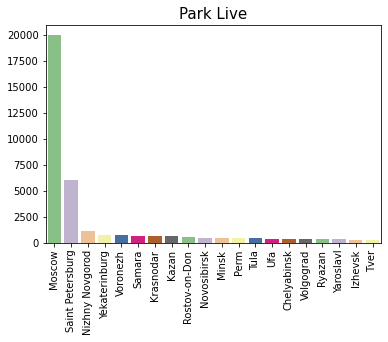

In [246]:
sns.barplot(city_count.index, city_count.values, palette='Accent') # рисуем график, выбираем цвет
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.title('Park Live', fontsize=15)
plt.show() # показываем изображение

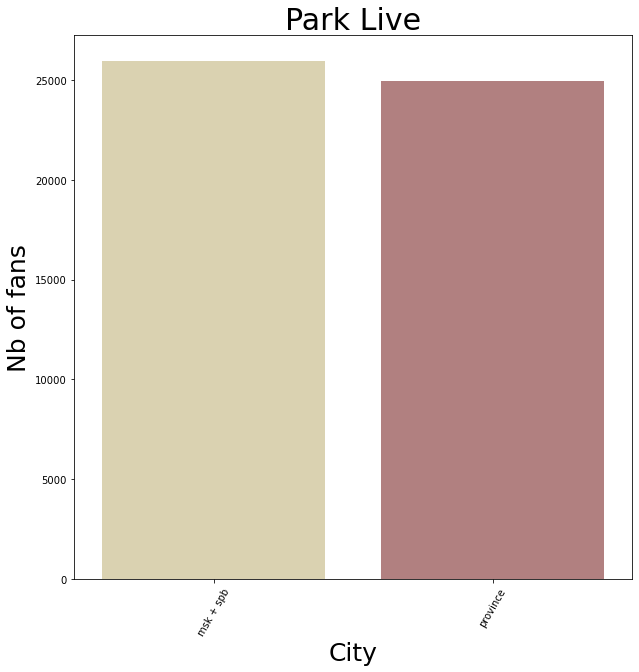

In [158]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Saint Petersburg')] = "msk + spb"
df.loc[(df['city'] != "msk + spb") & (df['city'] != "-")] = "province"


city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
plt.figure(figsize=(10,10)) #размер картинки
ax = sns.barplot(city_count.index,city_count.values, palette='pink_r') # рисуем график, выбираем цвет
plt.title('Park Live', fontsize=30)
plt.ylabel('Nb of fans', fontsize=25)
plt.xlabel('City', fontsize=25)
plt.xticks(rotation=60) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение# your code here

In [191]:
import numpy as np
import matplotlib.pyplot as plt

In [195]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [197]:
posts = get_posts("parklivefest")
                      
posts[:10]

['Новинка от FEVER 333 — «BITE BACK»!\n\n🔥 EP «Wrong Generation» выходит уже в эту пятницу.',
 '[club132949934|Biffy Clyro] поделились версией песни «Space», которую они записали на легендарной студии Abbey Road при участии оркестра 🎼',
 'Третьему альбому [club91683885|Placebo] «Black Market Music» исполняется 20 лет!\n\n💬 В честь этого группа поделилась архивными съёмками и интервью того периода.',
 'FEVER 333 анонсировали новый EP «Wrong Generation» — он выйдет уже 23 октября. \n\nВ честь этого группа проведёт серию онлайн-демонстраций по всему миру, в том числе и специальный концерт для российских фанатов, который состоится 29 октября в 21:00 по московскому времени!\n\nБилеты в продаже с завтрашнего дня: fever333.veeps.com',
 'Bullet for My Valentine выступят перед Slipknot 16 июля на Park Live 2021.\n\n📌 Билеты в продаже: https://park.live/\n\nЛужники Парк\nBFMV x Park Live',
 'Ровно 25 лет назад Deftones выпустили дебютный альбом «Adrenaline»!\n\nНесмотря на то, что пластинка почт

In [198]:
import re

In [199]:
pattern_link = re.compile(r"[A-z0-9]+[:/\.]+[A-z0-9]+[\./]+[A-z0-9]+[A-z0-9\./]+\b")

In [200]:
def replace_weblinks(posts):
    return re.sub(pattern_link, "WEBLINK", posts)
posts = [replace_weblinks(post) for post in posts] 

In [201]:
posts

['Новинка от FEVER 333 — «BITE BACK»!\n\n🔥 EP «Wrong Generation» выходит уже в эту пятницу.',
 '[club132949934|Biffy Clyro] поделились версией песни «Space», которую они записали на легендарной студии Abbey Road при участии оркестра 🎼',
 'Третьему альбому [club91683885|Placebo] «Black Market Music» исполняется 20 лет!\n\n💬 В честь этого группа поделилась архивными съёмками и интервью того периода.',
 'FEVER 333 анонсировали новый EP «Wrong Generation» — он выйдет уже 23 октября. \n\nВ честь этого группа проведёт серию онлайн-демонстраций по всему миру, в том числе и специальный концерт для российских фанатов, который состоится 29 октября в 21:00 по московскому времени!\n\nБилеты в продаже с завтрашнего дня: WEBLINK',
 'Bullet for My Valentine выступят перед Slipknot 16 июля на Park Live 2021.\n\n📌 Билеты в продаже: WEBLINK/\n\nЛужники Парк\nBFMV x Park Live',
 'Ровно 25 лет назад Deftones выпустили дебютный альбом «Adrenaline»!\n\nНесмотря на то, что пластинка почти полностью была запи

In [202]:
pattern_mention = re.compile(r"[\(\[]+[a-z0-9]+\|[A-z0-9 А-я'\/\(\)\"]+[\]()]")

In [203]:
def replace_mentions(posts):
    return re.sub(pattern_mention, "MENTION", posts)

In [204]:
posts = [replace_mentions(post) for post in posts]
print(posts)

['Новинка от FEVER 333 — «BITE BACK»!\n\n🔥 EP «Wrong Generation» выходит уже в эту пятницу.', 'MENTION поделились версией песни «Space», которую они записали на легендарной студии Abbey Road при участии оркестра 🎼', 'Третьему альбому MENTION «Black Market Music» исполняется 20 лет!\n\n💬 В честь этого группа поделилась архивными съёмками и интервью того периода.', 'FEVER 333 анонсировали новый EP «Wrong Generation» — он выйдет уже 23 октября. \n\nВ честь этого группа проведёт серию онлайн-демонстраций по всему миру, в том числе и специальный концерт для российских фанатов, который состоится 29 октября в 21:00 по московскому времени!\n\nБилеты в продаже с завтрашнего дня: WEBLINK', 'Bullet for My Valentine выступят перед Slipknot 16 июля на Park Live 2021.\n\n📌 Билеты в продаже: WEBLINK/\n\nЛужники Парк\nBFMV x Park Live', 'Ровно 25 лет назад Deftones выпустили дебютный альбом «Adrenaline»!\n\nНесмотря на то, что пластинка почти полностью была записана вживую в очень сжатые сроки, критик

In [205]:
def clean_text(posts):
    posts = re.sub(pattern_link, "WEBLINK", posts)
    posts = re.sub(pattern_mention, "MENTION", posts)
    posts = posts.replace("\n", " ")
    return posts
with open('parklive.txt', 'w', encoding="utf-8") as f:
    for post in posts:
        cleaned = clean_text(post)
        f.write(cleaned+"\n")

In [206]:
posts = "".join(posts)

In [207]:
posts

'Новинка от FEVER 333 — «BITE BACK»!\n\n🔥 EP «Wrong Generation» выходит уже в эту пятницу.MENTION поделились версией песни «Space», которую они записали на легендарной студии Abbey Road при участии оркестра 🎼Третьему альбому MENTION «Black Market Music» исполняется 20 лет!\n\n💬 В честь этого группа поделилась архивными съёмками и интервью того периода.FEVER 333 анонсировали новый EP «Wrong Generation» — он выйдет уже 23 октября. \n\nВ честь этого группа проведёт серию онлайн-демонстраций по всему миру, в том числе и специальный концерт для российских фанатов, который состоится 29 октября в 21:00 по московскому времени!\n\nБилеты в продаже с завтрашнего дня: WEBLINKBullet for My Valentine выступят перед Slipknot 16 июля на Park Live 2021.\n\n📌 Билеты в продаже: WEBLINK/\n\nЛужники Парк\nBFMV x Park LiveРовно 25 лет назад Deftones выпустили дебютный альбом «Adrenaline»!\n\nНесмотря на то, что пластинка почти полностью была записана вживую в очень сжатые сроки, критики по достоинству оцен

In [208]:
words_re = [i.strip() for i in re.split(r"([ \.\?!,]{1,})", posts) if i.strip()] # и это повторяется от 1 до бесконечности раз
print(words_re)

['Новинка', 'от', 'FEVER', '333', '—', '«BITE', 'BACK»', '!', '🔥', 'EP', '«Wrong', 'Generation»', 'выходит', 'уже', 'в', 'эту', 'пятницу', '.', 'MENTION', 'поделились', 'версией', 'песни', '«Space»', ',', 'которую', 'они', 'записали', 'на', 'легендарной', 'студии', 'Abbey', 'Road', 'при', 'участии', 'оркестра', '🎼Третьему', 'альбому', 'MENTION', '«Black', 'Market', 'Music»', 'исполняется', '20', 'лет', '!', '💬', 'В', 'честь', 'этого', 'группа', 'поделилась', 'архивными', 'съёмками', 'и', 'интервью', 'того', 'периода', '.', 'FEVER', '333', 'анонсировали', 'новый', 'EP', '«Wrong', 'Generation»', '—', 'он', 'выйдет', 'уже', '23', 'октября', '.', 'В', 'честь', 'этого', 'группа', 'проведёт', 'серию', 'онлайн-демонстраций', 'по', 'всему', 'миру', ',', 'в', 'том', 'числе', 'и', 'специальный', 'концерт', 'для', 'российских', 'фанатов', ',', 'который', 'состоится', '29', 'октября', 'в', '21:00', 'по', 'московскому', 'времени', '!', 'Билеты', 'в', 'продаже', 'с', 'завтрашнего', 'дня:', 'WEBLINKB

In [221]:
from pymystem3 import Mystem

ModuleNotFoundError: No module named 'pymystem3'

In [ ]:
def lemmatize_text(posts):
    m = Mystem()
    lemmas = m.lemmatize(posts)
    lemmatized_text = ''.join(lemmas)
    return lemmatized_text

In [ ]:
lemmatize_text(posts)

In [192]:
!pip install natasha

     |████████████████████████████████| 34.4 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 215 kB/s  eta 0:00:01
     |████████████████████████████████| 55 kB 3.5 MB/s eta 0:00:011
     |████████████████████████████████| 49 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 8.2 MB 8.4 MB/s eta 0:00:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=6a0f5e09809e2c9f157510cb8a4f2455acd344908efa3815f9111eaad5cd51ad
  Stored in directory: /Users/alyona/Library/Caches/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [228]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [229]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [230]:
doc = Doc(posts)
doc.segment(segmenter)

In [231]:
[i.text for i in doc.sents]

['Новинка от FEVER 333 — «BITE BACK»!',
 '🔥 EP «Wrong Generation» выходит уже в эту пятницу.MENTION поделились версией песни «Space», которую они записали на легендарной студии Abbey Road при участии оркестра 🎼Третьему альбому MENTION «Black Market Music» исполняется 20 лет!',
 '💬 В честь этого группа поделилась архивными съёмками и интервью того периода.FEVER 333 анонсировали новый EP «Wrong Generation» — он выйдет уже 23 октября.',
 'В честь этого группа проведёт серию онлайн-демонстраций по всему миру, в том числе и специальный концерт для российских фанатов, который состоится 29 октября в 21:00 по московскому времени!',
 'Билеты в продаже с завтрашнего дня: WEBLINKBullet for My Valentine выступят перед Slipknot 16 июля на Park Live 2021.',
 '📌 Билеты в продаже: WEBLINK/\n\nЛужники Парк\nBFMV x Park LiveРовно 25 лет назад Deftones выпустили дебютный альбом «Adrenaline»!',
 'Несмотря на то, что пластинка почти полностью была записана вживую в очень сжатые сроки, критики по достоинств

In [232]:
print([i.text for i in doc.tokens])

['Новинка', 'от', 'FEVER', '333', '—', '«', 'BITE', 'BACK', '»', '!', '🔥', 'EP', '«', 'Wrong', 'Generation', '»', 'выходит', 'уже', 'в', 'эту', 'пятницу', '.', 'MENTION', 'поделились', 'версией', 'песни', '«', 'Space', '»', ',', 'которую', 'они', 'записали', 'на', 'легендарной', 'студии', 'Abbey', 'Road', 'при', 'участии', 'оркестра', '🎼Третьему', 'альбому', 'MENTION', '«', 'Black', 'Market', 'Music', '»', 'исполняется', '20', 'лет', '!', '💬', 'В', 'честь', 'этого', 'группа', 'поделилась', 'архивными', 'съёмками', 'и', 'интервью', 'того', 'периода', '.', 'FEVER', '333', 'анонсировали', 'новый', 'EP', '«', 'Wrong', 'Generation', '»', '—', 'он', 'выйдет', 'уже', '23', 'октября', '.', 'В', 'честь', 'этого', 'группа', 'проведёт', 'серию', 'онлайн-демонстраций', 'по', 'всему', 'миру', ',', 'в', 'том', 'числе', 'и', 'специальный', 'концерт', 'для', 'российских', 'фанатов', ',', 'который', 'состоится', '29', 'октября', 'в', '21', ':', '00', 'по', 'московскому', 'времени', '!', 'Билеты', 'в', 

In [ ]:
locations = set()
persons = set()
organizations = set()

with open("texts.txt", 'r', encoding="utf-8") as f:
    for line in f:
        posts = line.strip()
        
        doc = Doc(posts)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [233]:
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [234]:
print([i.lemma for i in doc.tokens])

['новинка', 'от', 'fever', '333', '—', '«', 'bite', 'back', '»', '!', '🔥', 'ep', '«', 'wrong', 'generation', '»', 'выходить', 'уже', 'в', 'этот', 'пятница', '.', 'mention', 'поделиться', 'версия', 'песня', '«', 'space', '»', ',', 'который', 'они', 'записать', 'на', 'легендарный', 'студия', 'abbey', 'road', 'при', 'участие', 'оркестр', '🎼третьему', 'альбом', 'mention', '«', 'black', 'market', 'music', '»', 'исполняться', '20', 'год', '!', '💬', 'в', 'честь', 'этот', 'группа', 'поделиться', 'архивный', 'съемка', 'и', 'интервью', 'тот', 'период', '.', 'fever', '333', 'анонсировать', 'новый', 'ep', '«', 'wrong', 'generation', '»', '—', 'он', 'выйти', 'уже', '23', 'октябрь', '.', 'в', 'честь', 'этот', 'группа', 'провести', 'серия', 'онлайн-демонстрация', 'по', 'весь', 'мир', ',', 'в', 'тот', 'число', 'и', 'специальный', 'концерт', 'для', 'российский', 'фанат', ',', 'который', 'состояться', '29', 'октябрь', 'в', '21', ':', '00', 'по', 'московский', 'время', '!', 'билет', 'в', 'продажа', 'с', 

In [242]:
doc.tag_ner(ner_tagger)

In [236]:
for span in doc.spans:
    print(posts[span.start:span.stop], span.type)

Abbey Road ORG
Slipknot ORG
Лужники ORG
Deftones ORG
Джим Рут PER
Gorillaz ORG
Элтон Джон PER
MENTION 🎹Джей Вайнберг PER
MENTION ORG
Фрэнк Айеро PER
My Chemical Romance ORG
Джейсон Батлер PER
FEVER 333 ORG
Touché Amoré ORG
Мэтт Доннелли PER
Don Broco ORG
Морено PER
Афише Daily ORG
Мэтт Уэст PER
MENTION ORG
Майк PER
Бен PER
Deftones ORG
Шон Крейен PER
MENTION ORG
Gorillaz ORG
Slipknot ORG
WEBLINK/🔥 Gorillaz ORG
The Cure ORG
Роберта Смита PER
SLIPKNOT ORG
WEBLINK/

🔥 ORG
Яндекс ORG
ruPoppy ORG
Crossfaith ORG
Fever 333 ORG
Deftones ORG
Biffy Clyro ORG
Саймону Нилу PER
Deftones ORG
The Killers ORG
Park Live ORG
Мигель Лопез Мор PER
MENTION ORG
Стэфан Олсдал PER
Digital 21 + Stefan Olsdal ORG
Poppy ORG
The Killers ORG
MENTION ORG
России LOC
Park Live ORG
Deftones ORG
Стивен Карпентер PER
Weird Leisure ORG
Park Live ORG
Twin Atlantic ORG
Park Live ORG
Yonaka ORG
Biffy Clyro ORG
Placebo ORG
Брайтона LOC
Royal Blood ORG
The Killers ORG
royalbloodCrossfaith ORG
Deftones ORG
Джейсон Аалон Батлер

Открытие Арена ORG
Park Live ORG
MUSE ORG
Park live ORG
Incubus ORG
Россию LOC
TRIGGERFINGER ORG
Москвы LOC
Зеленом театре ORG
Горького LOC
Стадиона "Открытие Арена ORG
RedWhite Store ORG
Западной LOC
Спартак ORG
Волоколамское LOC
RUE&doc ORG
artistPages ORG
Стадиона "Открытие Арена ORG
RedWhite Store ORG
Западной LOC
Спартак ORG
Волоколамское LOC
RUE&doc ORG
artistPages ORG
Открытие Арена ORG
Park Live ORG
MUSE ORG
Park live ORG
Incubus ORG
Россию LOC
TRIGGERFINGER ORG
Москвы LOC
Зеленом театре ORG
Горького LOC
Стадиона "Открытие Арена ORG
RedWhite Store ORG
Западной LOC
Спартак ORG
Волоколамское LOC
Москве LOC
Park Live! ORG
Стадиона "Открытие Арена ORG
RedWhite Store ORG
Западной LOC
Спартак ORG
Волоколамское LOC
RUE&doc ORG
artistPages ORG
Park Live ORG
Стадиона "Открытие Арена ORG
RedWhite Store ORG
Западной LOC
Спартак ORG
Волоколамское LOC
RUE&doc ORG
artistPages ORG
MUSE ORG
MUSE ORG
Открытие Арена ORG
Park Live ORG
MUSE ORG
Park Live ORG
Incubus ORG
Россию LOC
Зеленом театре O

In [243]:
with open("posts_PA.txt", 'w', encoding="utf-8") as w:
    for i in posts:
        w.write(i+"\n")

In [238]:
locations = set()
persons = set()
organizations = set()

with open("texts.txt", 'r', encoding="utf-8") as f:
    for line in f:
        posts = line.strip()
        
        doc = Doc(posts)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [239]:
print(locations)

{'Новосибирск', 'Челябинск', 'Мурманск', 'Земля', 'Ярославль', 'Покровка', 'Сахаров', 'Сахарова', 'Екатеринбург', 'Культура', 'Питер', 'Спб', 'Рига', 'Жара', 'Одесса', 'Таллинн', 'Архангельск', 'Владивосток', 'Грузия', 'Воронеж', 'Ростов-на-Дону', 'Аврора', 'Калининград', 'Кровосток ⚡ Голова', 'Череповец', 'Тбилиси', 'Главклуб', 'Латвия', 'Тель-Авив', 'Россия-Матушка', 'Москва', 'Нижний Новгород', 'Уфа', 'Кровосток', 'Киев', 'Галактика Развлечений', 'Лондон', 'Таллин', 'Ярославский', 'Ярославское обл', 'Самара', 'Казань', 'Телеклуб', 'Смоленск', 'Вологда', 'Харьков', 'Россия', 'Санкт-Петербург', 'Берлин'}


In [240]:
print(persons)

{'Фантомас', 'Фантомас 2000  Звукоинженер', 'Медиазоны', 'Питер', 'Давид Тогонидзе  Дизайн', 'Хади Такташ', 'Антон Шило Кровосток', 'Вронеж', 'Мастеринг', 'Душ', 'Наек Ек', 'Чиж Запись', 'Александр Софеев', 'Кровосток', 'Агата Мирзаев', 'Дамир Гайнутдинов', 'Шило', 'Полутруп', 'Фильм-фильм-фильм', 'Ксения Собчак', 'Андрей Козенко', 'Менсон', 'Дудя', 'Фельдман', 'Ростов-папа', 'Ростов-Папа', 'Тактик Звук', 'Голов', 'Прись', 'Андрей Болд  Менеджмент', 'Михаил Максимов'}


In [241]:
print(organizations)

{'YOTASPACE WEBLINK', 'Nightparty.ru', 'Кровосток «Студень', 'RED club', 'Яндекс', 'КРОВОСТОК', 'Кровосток Лайв', 'Кровосток /', 'Urban Culture Fest  WEBLINKanculturefest', 'Известия Hall  WEBLINK', 'AURORA Concert Hall WEBLINK', 'Meduza', 'WEBLINK-eto-to-kak-ty-soprotivlyaeshsya/', 'AURORA Concert Hall  WEBLINK', 'Кировский районный суд', 'Urban Culture Fest WEBLINKanculturefest', 'Columbia Theater', '#Кровосток', 'ГЛАВCLUB WEBLINK', 'Аврора', 'Apple', 'Кровостока', 'Ярославский суд', 'DIAMOND MUSIC HALL WEBLINK', 'MENTION  #кровосток', 'ГЛАВCLUB', 'Google', 'iTunes', 'MENTION', 'Известия Hall', 'Дождь', 'AURORA Concert Hall', 'YOTASPACE', 'Музей уличное искусство', 'Кровосток', 'Кровосток - Душ', 'BBC Русская служба', 'Arbat Hall', 'ХХС', 'Кровосток - Душ drumcover by MENTION', 'Главклуб MENTION', 'Cathouse Concert Hall', 'RED club  WEBLINK', 'ATLAS', 'Сеть', 'ЧБ', 'MENTION WEBLINK', 'MENTION  WEBLINK', 'СПб', 'WEBLINK', 'Bono Beach Club  WEBLINK', 'MODe', 'ЗАВОД', 'Нижний Новогород 